In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [36]:
smsdf =  pd.read_csv('./datasets/sms_spamham.csv',encoding='latin1')
smsdf = smsdf[['v1','v2']]
smsdf['res'] = smsdf['v1'].map({'ham':0,'spam':1})
smsdf = smsdf.rename(columns={'v1':'dummy','v2':'text','res':'spamham'})
smsdf.drop('dummy',inplace=True,axis=1)
smsdf.head()

,text,spamham
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
smsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     5572 non-null   object
 1   spamham  5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [38]:
emaildf =  pd.read_csv('./datasets/email_spamham.csv',encoding='latin1')
emaildf.drop(['Unnamed: 0','label'],inplace=True,axis=1)
emaildf = emaildf.rename(columns={'text':'text','label_num':'spamham'})
emaildf.head()

,text,spamham
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [39]:
emaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     5171 non-null   object
 1   spamham  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [40]:
spam = pd.concat([emaildf,smsdf])
spam.head()

,text,spamham
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [41]:
print(smsdf.shape,emaildf.shape,spam.shape)
#concat success

(5572, 2) (5171, 2) (10743, 2)


In [44]:
#shuffling the dataset
spam = spam.sample(frac=1)
spam.head()

,text,spamham
1594,Never blame a day in ur life. Good days give u...,0
1459,Subject: stockalert : investors need to know\r...,1
1022,Subject: cp & l\r\nplease add a deal in march ...,0
1195,You have 1 new voicemail. Please call 08719181503,1
4449,Subject: ena 202 and hpl 216 transport contrac...,0


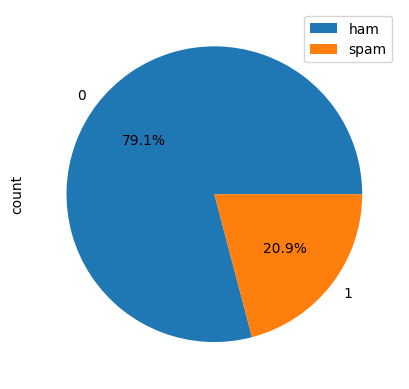

In [43]:
spam["spamham"].value_counts().plot(kind="pie", autopct="%.1f%%").legend(labels=['ham','spam'])
